# Importing DataSet

In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import make_scorer, f1_score, accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score

from sklearn.cluster import KMeans

In [63]:
df = pd.read_csv('ObesityDataSet.csv')

In [64]:
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [65]:
df.shape

(2111, 17)

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [67]:
df.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


In [68]:
df.columns

Index(['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE',
       'CALC', 'MTRANS', 'NObeyesdad'],
      dtype='object')

In [69]:
df.columns = ['Gender', 'Age', 'Height', 'Weight', 'Family History with Overweight',
       'Frequent consumption of high caloric food', 'Frequency of consumption of vegetables', 'Number of main meals', 'Consumption of food between meals', 'Smoke', 'Consumption of water daily', 'Calories consumption monitoring', 'Physical activity frequency', 'Time using technology devices',
       'Consumption of alcohol', 'Transportation used', 'Obesity']

df.head()

,Gender,Age,Height,Weight,Family History with Overweight,Frequent consumption of high caloric food,Frequency of consumption of vegetables,Number of main meals,Consumption of food between meals,Smoke,Consumption of water daily,Calories consumption monitoring,Physical activity frequency,Time using technology devices,Consumption of alcohol,Transportation used,Obesity
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [70]:
df['Obesity'] = df['Obesity'].apply(lambda x: x.replace('_', ' '))
df['Transportation used'] = df['Transportation used'].apply(lambda x: x.replace('_', ' '))
df['Height'] = df['Height']*100
df['Height'] = df['Height'].round(1)
df['Weight'] = df['Weight'].round(1)
df['Age'] = df['Age'].round(1)
df.head()

,Gender,Age,Height,Weight,Family History with Overweight,Frequent consumption of high caloric food,Frequency of consumption of vegetables,Number of main meals,Consumption of food between meals,Smoke,Consumption of water daily,Calories consumption monitoring,Physical activity frequency,Time using technology devices,Consumption of alcohol,Transportation used,Obesity
0,Female,21.0,162.0,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public Transportation,Normal Weight
1,Female,21.0,152.0,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public Transportation,Normal Weight
2,Male,23.0,180.0,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public Transportation,Normal Weight
3,Male,27.0,180.0,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight Level I
4,Male,22.0,178.0,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public Transportation,Overweight Level II


# EDA

In [71]:
for x in ['Frequency of consumption of vegetables', 'Number of main meals', 'Consumption of water daily', 'Physical activity frequency', 'Time using technology devices']:
    df[x] = df[x].apply(round)
    value = np.array(df[x])
    print(x,':', 'min:', np.min(value), 'max:', np.max(value), df[x].dtype)
    print(df[x].unique())

Frequency of consumption of vegetables : min: 1 max: 3 int64
[2 3 1]
Number of main meals : min: 1 max: 4 int64
[3 1 4 2]
Consumption of water daily : min: 1 max: 3 int64
[2 3 1]
Physical activity frequency : min: 0 max: 3 int64
[0 3 2 1]
Time using technology devices : min: 0 max: 2 int64
[1 0 2]


In [72]:
df1 = df.copy()

In [73]:
mp0 = {1:'Never', 2:'Sometimes', 3:'Always'}
mp1 = {1: '1', 2:'2' , 3: '3', 4: '3+'}
mp2 = {1: 'Less than a liter', 2:'Between 1 and 2 L', 3:'More than 2 L'}
mp3 = {0: 'I do not have', 1: '1 or 2 days', 2: '2 or 4 days', 3: '4 or 5 days'}
mp4 = {0: '0–2 hours', 1: '3–5 hours', 2: 'More than 5 hours'}

In [74]:
df['Frequency of consumption of vegetables'] = df['Frequency of consumption of vegetables'].replace(mp0)
df['Number of main meals'] = df['Number of main meals'].replace(mp1)
df['Consumption of water daily'] = df['Consumption of water daily'].replace(mp2)
df['Physical activity frequency'] = df['Physical activity frequency'].replace(mp3)
df['Time using technology devices'] = df['Time using technology devices'].replace(mp4)

In [75]:
df.head()

,Gender,Age,Height,Weight,Family History with Overweight,Frequent consumption of high caloric food,Frequency of consumption of vegetables,Number of main meals,Consumption of food between meals,Smoke,Consumption of water daily,Calories consumption monitoring,Physical activity frequency,Time using technology devices,Consumption of alcohol,Transportation used,Obesity
0,Female,21.0,162.0,64.0,yes,no,Sometimes,3,Sometimes,no,Between 1 and 2 L,no,I do not have,3–5 hours,no,Public Transportation,Normal Weight
1,Female,21.0,152.0,56.0,yes,no,Always,3,Sometimes,yes,More than 2 L,yes,4 or 5 days,0–2 hours,Sometimes,Public Transportation,Normal Weight
2,Male,23.0,180.0,77.0,yes,no,Sometimes,3,Sometimes,no,Between 1 and 2 L,no,2 or 4 days,3–5 hours,Frequently,Public Transportation,Normal Weight
3,Male,27.0,180.0,87.0,no,no,Always,3,Sometimes,no,Between 1 and 2 L,no,2 or 4 days,0–2 hours,Frequently,Walking,Overweight Level I
4,Male,22.0,178.0,89.8,no,no,Sometimes,1,Sometimes,no,Between 1 and 2 L,no,I do not have,0–2 hours,Sometimes,Public Transportation,Overweight Level II


In [125]:
import pickle
pickle.dump(df, open('df.pkl', 'wb'))

Gender, Height and Weight

<Axes: xlabel='Gender', ylabel='Weight'>

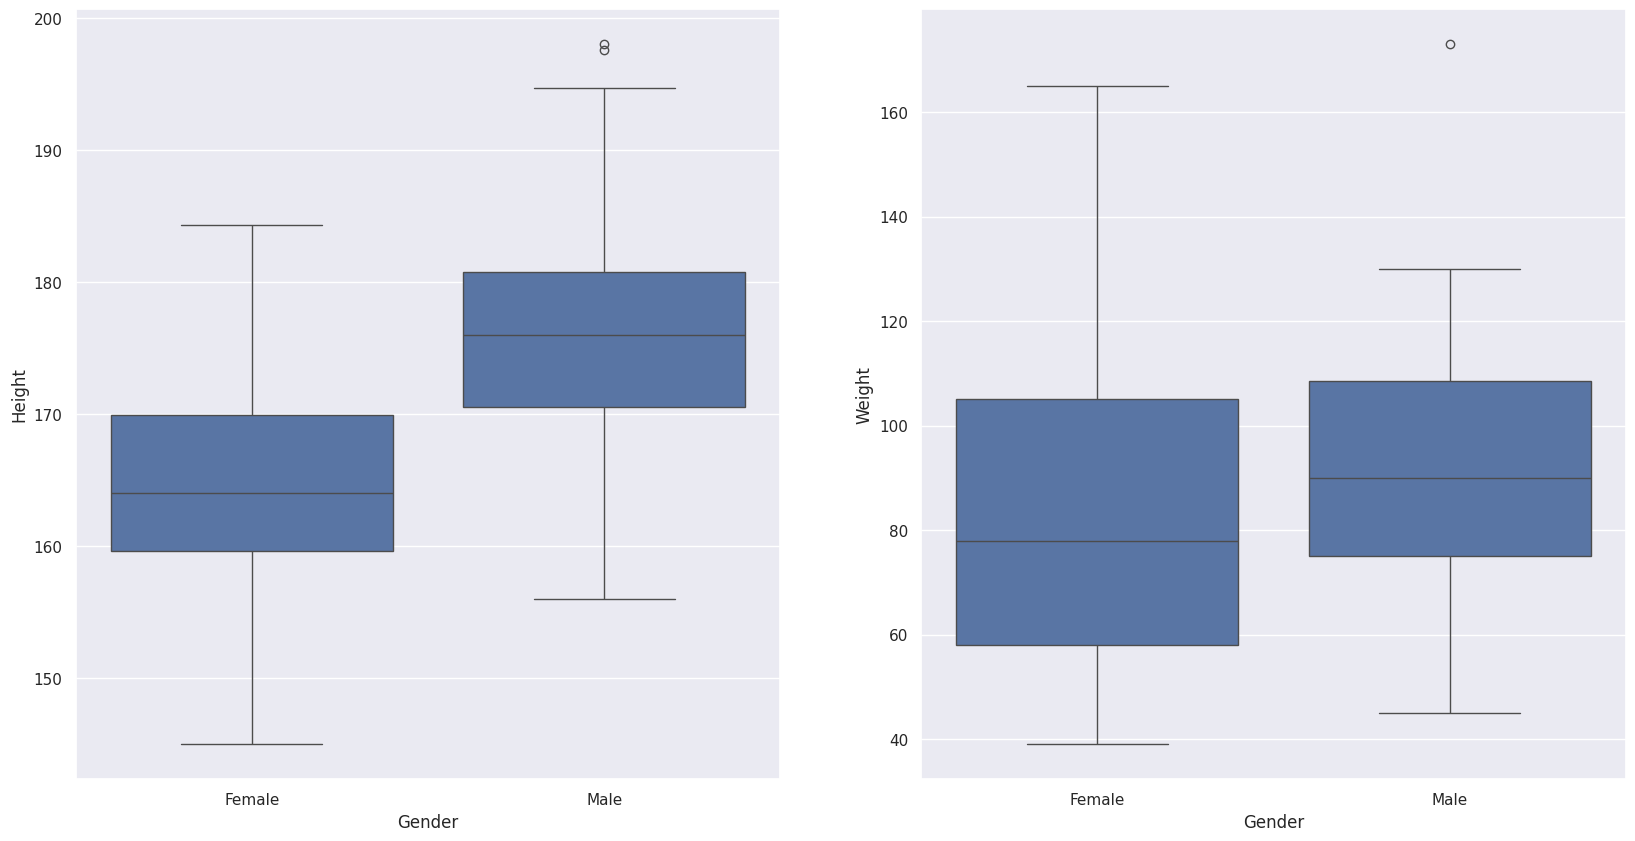

In [76]:
sns.set()
fig = plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
sns.boxplot(x='Gender', y='Height', data=df)
plt.subplot(1, 2, 2)
sns.boxplot(x='Gender', y='Weight', data=df)

Obesity

In [77]:
c = Counter(df['Obesity'])
c

Counter({'Normal Weight': 287,
         'Overweight Level I': 290,
         'Overweight Level II': 290,
         'Obesity Type I': 351,
         'Insufficient Weight': 272,
         'Obesity Type II': 297,
         'Obesity Type III': 324})

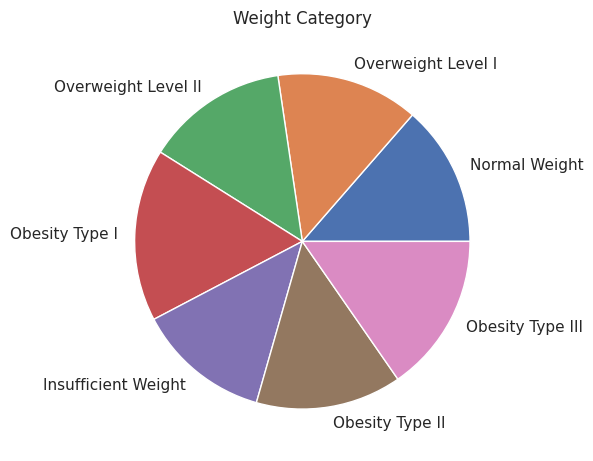

In [78]:
fig = plt.figure(figsize=(6,6))
plt.pie([float(c[v]) for v in c], labels=[str(k) for k in c], autopct=None)
plt.title('Weight Category')
plt.tight_layout()

Eating and Exercise

Family History with Overweight ['yes', 'no'] [1726, 385]
Frequent consumption of high caloric food ['yes', 'no'] [1866, 245]
Frequency of consumption of vegetables ['Sometimes', 'Always', 'Never'] [1013, 996, 102]
Number of main meals ['3', '1', '2', '3+'] [1470, 316, 176, 149]
Consumption of food between meals ['Sometimes', 'Frequently', 'Always', 'no'] [1765, 242, 53, 51]
Smoke ['no', 'yes'] [2067, 44]
Consumption of water daily ['Between 1 and 2 L', 'More than 2 L', 'Less than a liter'] [1110, 516, 485]
Calories consumption monitoring ['no', 'yes'] [2015, 96]
Physical activity frequency ['1 or 2 days', 'I do not have', '2 or 4 days', '4 or 5 days'] [776, 720, 496, 119]
Time using technology devices ['0–2 hours', '3–5 hours', 'More than 5 hours'] [952, 915, 244]
Consumption of alcohol ['Sometimes', 'no', 'Frequently', 'Always'] [1401, 639, 70, 1]
Transportation used ['Public Transportation', 'Automobile', 'Walking', 'Motorbike', 'Bike'] [1580, 457, 56, 11, 7]


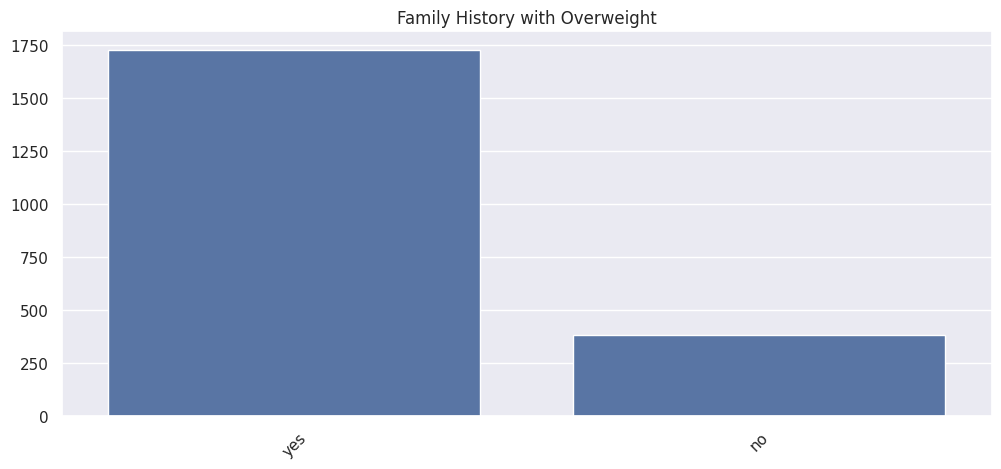

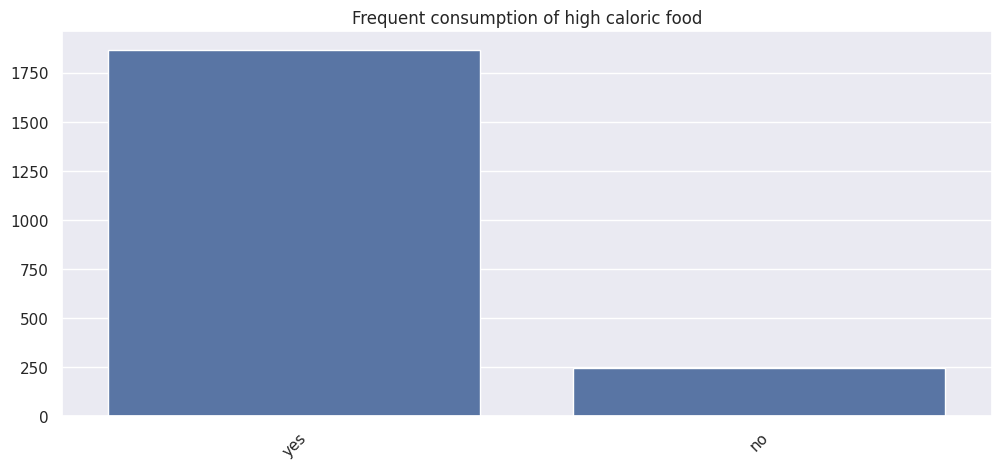

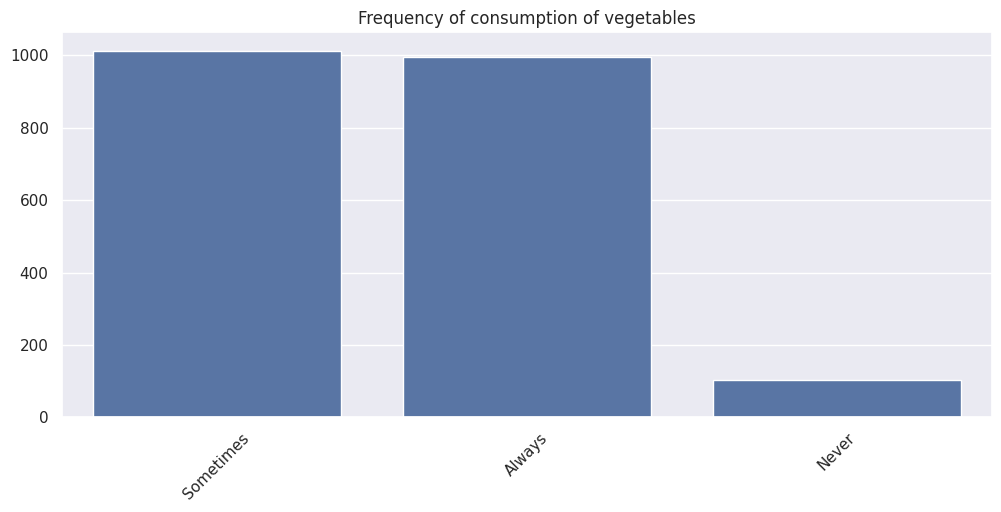

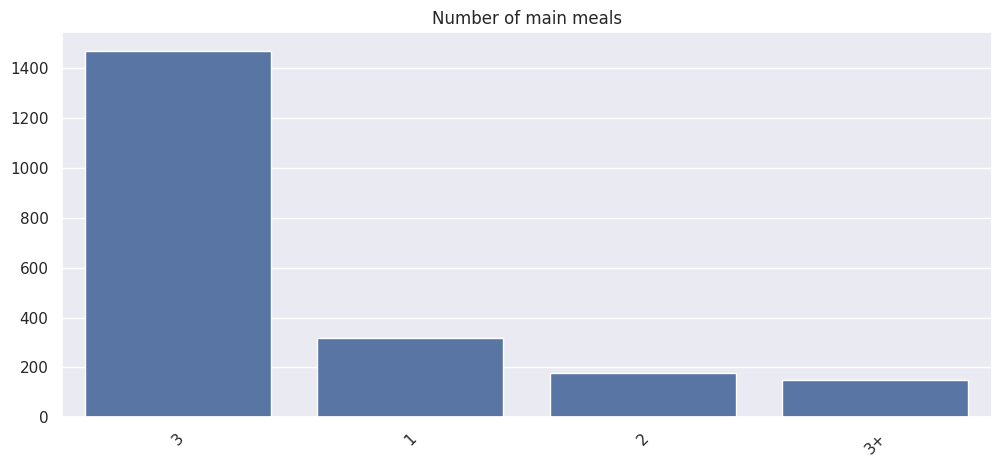

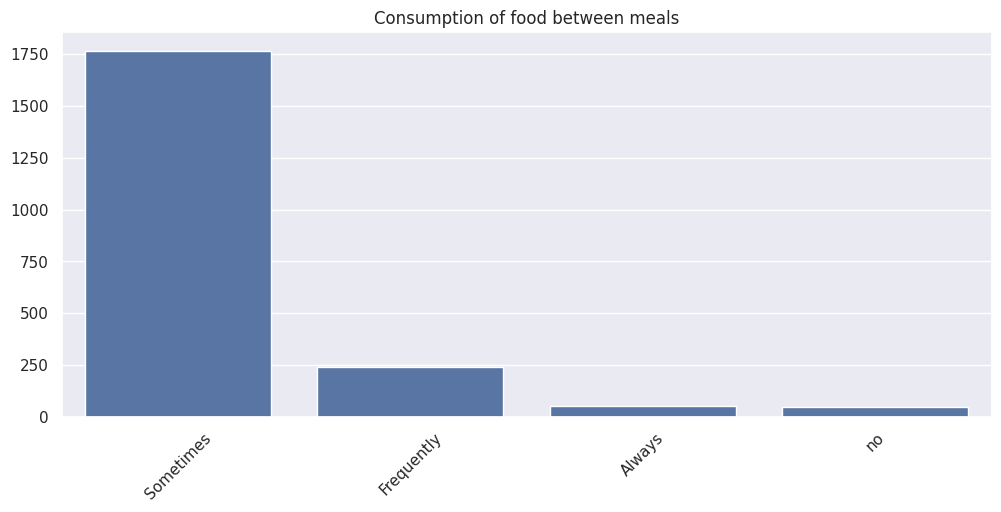

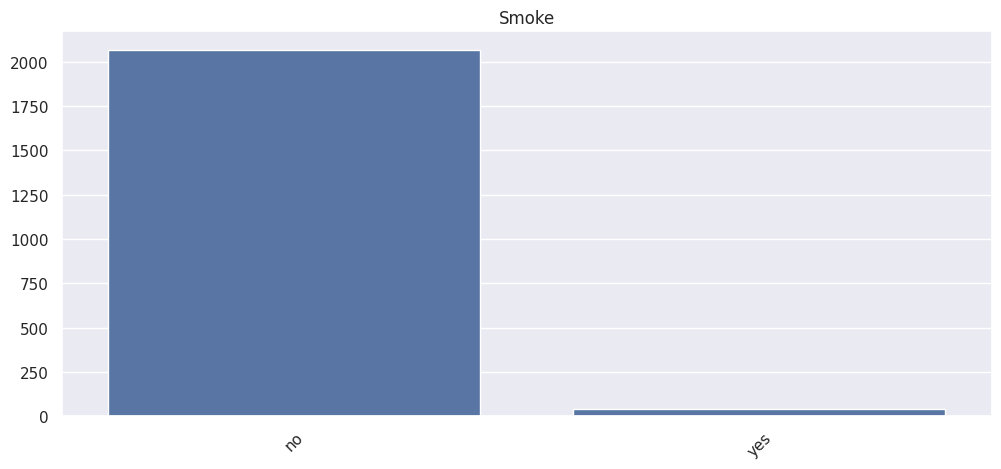

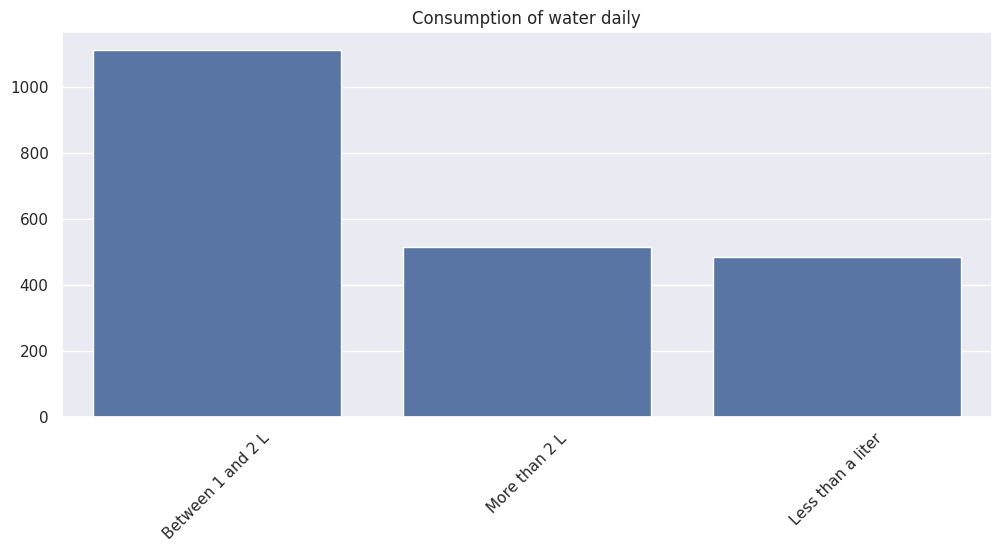

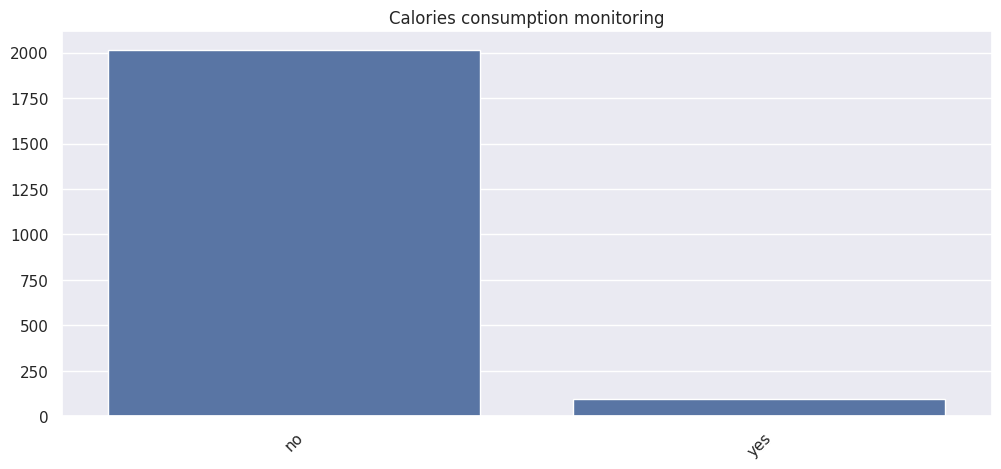

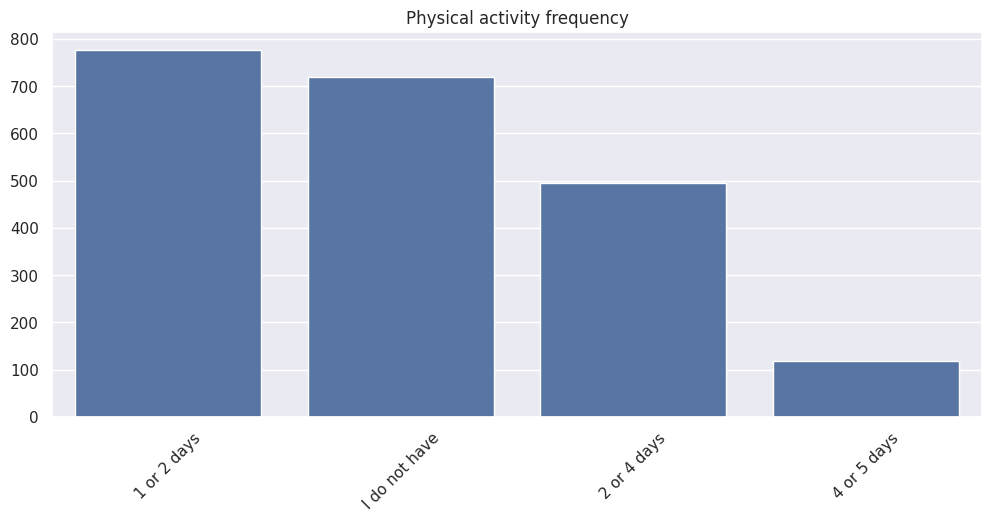

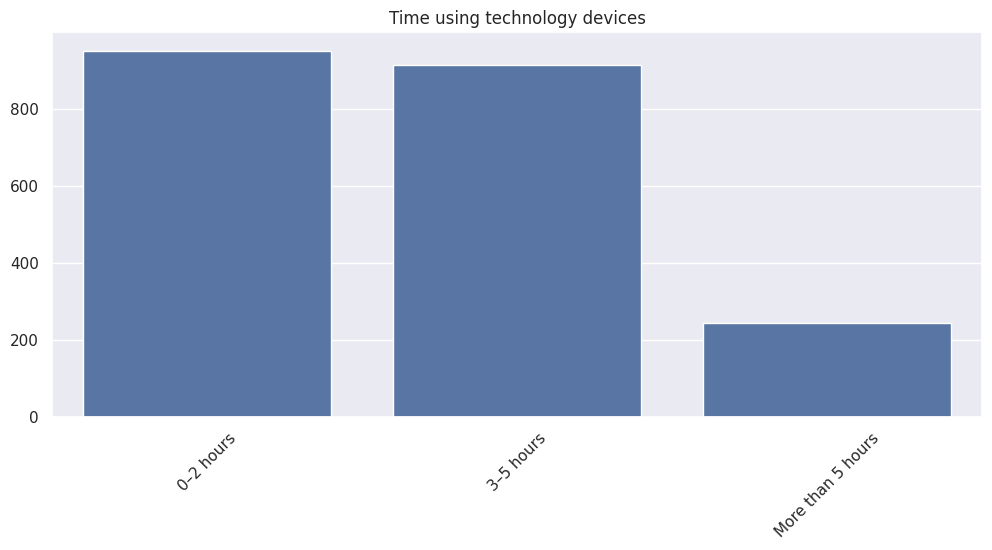

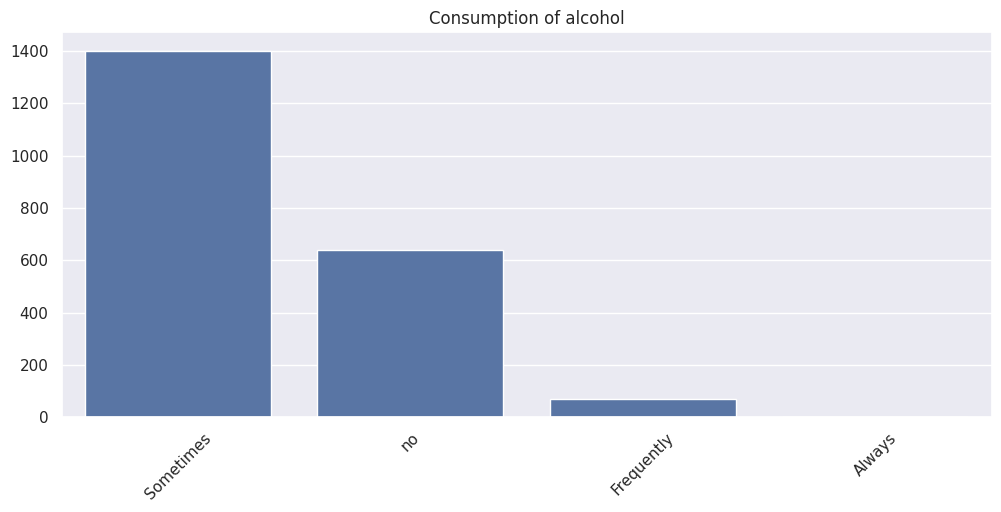

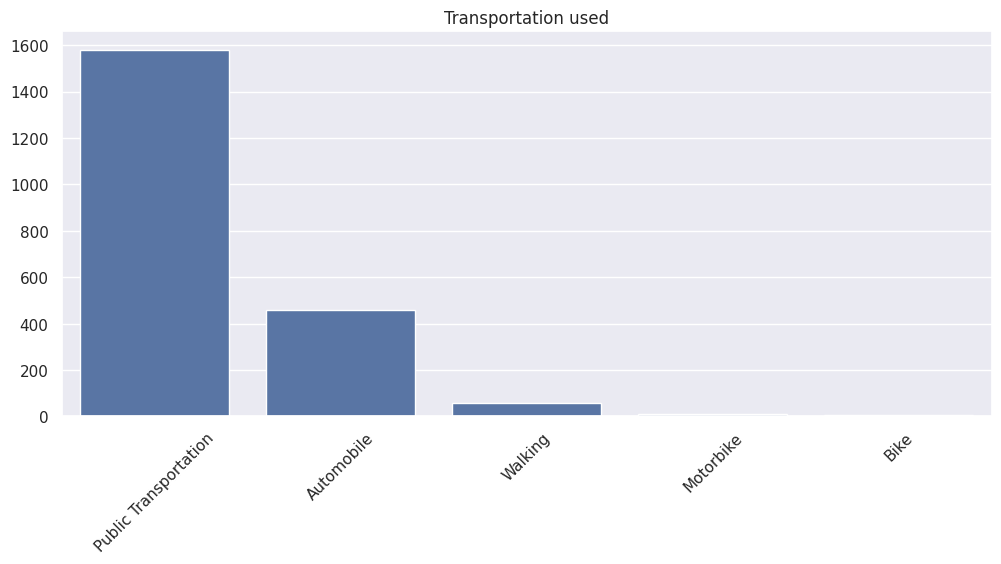

In [79]:
for a in df.columns[4:-1]:
    data = df[a].value_counts()
    values = df[a].value_counts().index.to_list()
    counts = df[a].value_counts().to_list()

    plt.figure(figsize=(12,5))
    ax = sns.barplot(x = values, y = counts)

    plt.title(a)
    plt.xticks(rotation=45)
    print(a, values, counts)

In [126]:
import pickle
pickle.dump(df1, open('df.pkl', 'wb'))

In [133]:
df1['Frequency of consumption of vegetables'].unique()

array([2, 3, 1])

# Feature Engineering

In [80]:
df1.head()

,Gender,Age,Height,Weight,Family History with Overweight,Frequent consumption of high caloric food,Frequency of consumption of vegetables,Number of main meals,Consumption of food between meals,Smoke,Consumption of water daily,Calories consumption monitoring,Physical activity frequency,Time using technology devices,Consumption of alcohol,Transportation used,Obesity
0,Female,21.0,162.0,64.0,yes,no,2,3,Sometimes,no,2,no,0,1,no,Public Transportation,Normal Weight
1,Female,21.0,152.0,56.0,yes,no,3,3,Sometimes,yes,3,yes,3,0,Sometimes,Public Transportation,Normal Weight
2,Male,23.0,180.0,77.0,yes,no,2,3,Sometimes,no,2,no,2,1,Frequently,Public Transportation,Normal Weight
3,Male,27.0,180.0,87.0,no,no,3,3,Sometimes,no,2,no,2,0,Frequently,Walking,Overweight Level I
4,Male,22.0,178.0,89.8,no,no,2,1,Sometimes,no,2,no,0,0,Sometimes,Public Transportation,Overweight Level II


In [81]:
cat = df1.dtypes == object
print(cat)

print(cat[cat])
cat_labels = cat[cat].index
print('Categorical variables:', cat_labels)

false = cat[~cat]
non_cat = false.index
print('Non Categorical variables:', non_cat)

Gender                                        True
Age                                          False
Height                                       False
Weight                                       False
Family History with Overweight                True
Frequent consumption of high caloric food     True
Frequency of consumption of vegetables       False
Number of main meals                         False
Consumption of food between meals             True
Smoke                                         True
Consumption of water daily                   False
Calories consumption monitoring               True
Physical activity frequency                  False
Time using technology devices                False
Consumption of alcohol                        True
Transportation used                           True
Obesity                                       True
dtype: bool
Gender                                       True
Family History with Overweight               True
Frequent consumption 

In [82]:
df1.columns
def col_no(x):
    d = {}
    d[df1.columns[x]] = x
    return(d)
print([col_no(x) for x in range(0, len(df1.columns))])

[{'Gender': 0}, {'Age': 1}, {'Height': 2}, {'Weight': 3}, {'Family History with Overweight': 4}, {'Frequent consumption of high caloric food': 5}, {'Frequency of consumption of vegetables': 6}, {'Number of main meals': 7}, {'Consumption of food between meals': 8}, {'Smoke': 9}, {'Consumption of water daily': 10}, {'Calories consumption monitoring': 11}, {'Physical activity frequency': 12}, {'Time using technology devices': 13}, {'Consumption of alcohol': 14}, {'Transportation used': 15}, {'Obesity': 16}]


Excluding target variable

In [83]:
X = df1[df1.columns[:-1]]
y = df1['Obesity']

In [85]:
categorical = [var for var in X.columns if X[var].dtypes == 'O']
numerical = [var for var in X.columns if X[var].dtypes != 'O']
print(f'Categorical features {categorical}')
print(f'Numerical features {numerical}')
X_categorical = X[categorical]
X_numeric = X[numerical]

Categorical features ['Gender', 'Family History with Overweight', 'Frequent consumption of high caloric food', 'Consumption of food between meals', 'Smoke', 'Calories consumption monitoring', 'Consumption of alcohol', 'Transportation used']
Numerical features ['Age', 'Height', 'Weight', 'Frequency of consumption of vegetables', 'Number of main meals', 'Consumption of water daily', 'Physical activity frequency', 'Time using technology devices']


In [88]:
X_temp = pd.get_dummies(X[['Gender', 'Family History with Overweight', 'Frequent consumption of high caloric food', 'Consumption of food between meals', 'Smoke', 'Calories consumption monitoring', 'Consumption of alcohol', 'Transportation used']])

In [90]:
X_new = pd.concat([X_numeric, X_temp], axis=1)

In [92]:
X_new.shape

(2111, 31)

In [93]:
X_new.dtypes

Age                                              float64
Height                                           float64
Weight                                           float64
Frequency of consumption of vegetables             int64
Number of main meals                               int64
Consumption of water daily                         int64
Physical activity frequency                        int64
Time using technology devices                      int64
Gender_Female                                       bool
Gender_Male                                         bool
Family History with Overweight_no                   bool
Family History with Overweight_yes                  bool
Frequent consumption of high caloric food_no        bool
Frequent consumption of high caloric food_yes       bool
Consumption of food between meals_Always            bool
Consumption of food between meals_Frequently        bool
Consumption of food between meals_Sometimes         bool
Consumption of food between mea

In [94]:
X_new = X_new.astype('float')

In [97]:
le = LabelEncoder()
y = le.fit_transform(y)

np.unique(y)

array([0, 1, 2, 3, 4, 5, 6])

In [102]:
list(le.classes_)

['Insufficient Weight',
 'Normal Weight',
 'Obesity Type I',
 'Obesity Type II',
 'Obesity Type III',
 'Overweight Level I',
 'Overweight Level II']

Splitting the data into training and testing set

In [98]:
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=42)

In [101]:
X_train.head(3)

,Age,Height,Weight,Frequency of consumption of vegetables,Number of main meals,Consumption of water daily,Physical activity frequency,Time using technology devices,Gender_Female,Gender_Male,...,Calories consumption monitoring_yes,Consumption of alcohol_Always,Consumption of alcohol_Frequently,Consumption of alcohol_Sometimes,Consumption of alcohol_no,Transportation used_Automobile,Transportation used_Bike,Transportation used_Motorbike,Transportation used_Public Transportation,Transportation used_Walking
162,21.0,163.0,60.0,3.0,3.0,2.0,2.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2001,20.9,175.3,133.6,3.0,3.0,3.0,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1435,22.9,166.2,82.6,1.0,1.0,3.0,0.0,2.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


# Model Training

In [103]:
from sklearn.metrics import f1_score, make_scorer

f1 = make_scorer(f1_score, average = "weighted")

In [104]:
params = {
    "max_depth": [5, 7, 9, 11, 13, 15]
}
grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid = params, cv = 5, scoring = f1)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [5, 7, 9, 11, 13, 15]},
             scoring=make_scorer(f1_score, average=weighted))

In [105]:
grid_search.best_params_

{'max_depth': 11}

In [106]:
model = DecisionTreeClassifier(max_depth = 11, random_state = 42)

In [107]:
model.fit(X_train.values, y_train)

DecisionTreeClassifier(max_depth=11, random_state=42)

In [108]:
print(f"Accuracy on Train data: {accuracy_score(y_train, model.predict(X_train))}")
print(f"F1 score on Train data: {f1_score(y_train, model.predict(X_train), average = 'weighted')}")
print(f"Accuracy on Test data: {accuracy_score(y_test, model.predict(X_test))}")
print(f"F1 on Test data: {f1_score(y_test, model.predict(X_test), average = 'weighted')}")

Accuracy on Train data: 1.0
F1 score on Train data: 1.0
Accuracy on Test data: 0.950354609929078
F1 on Test data: 0.9503250833687606


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


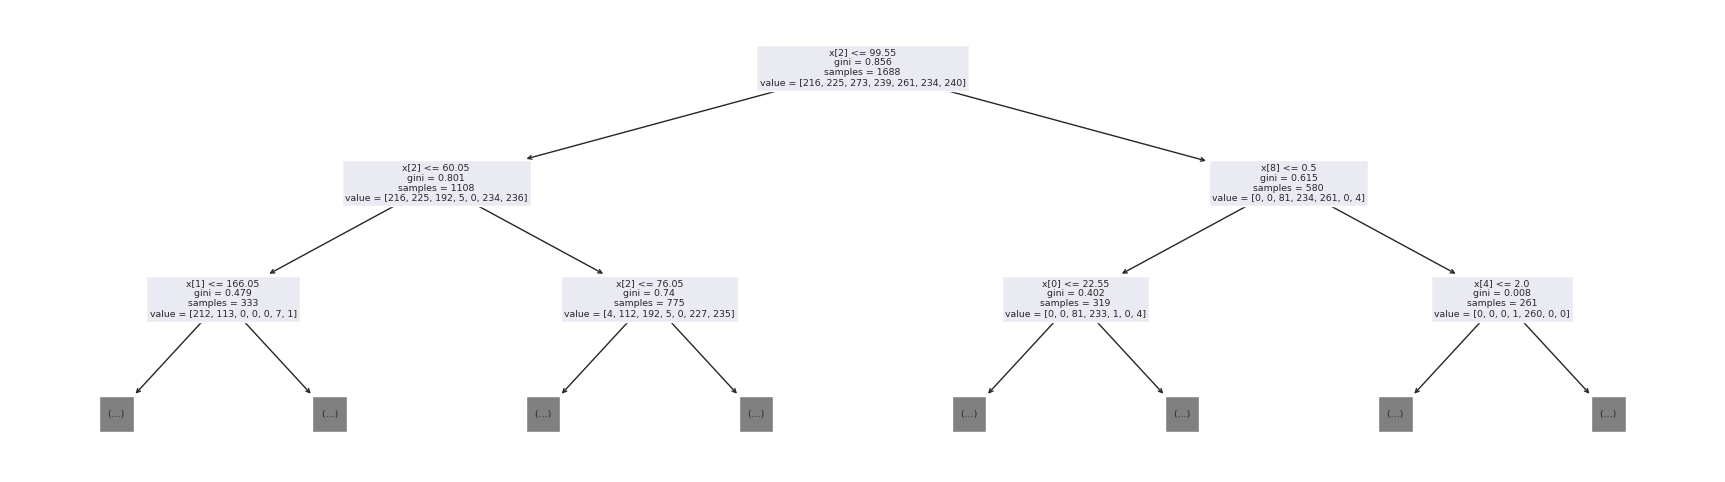

In [109]:
from sklearn.tree import plot_tree
plt.figure(figsize = (22, 6))
plot_tree(model, max_depth = 2)
plt.show()

Classification report

In [110]:
print(classification_report(y_test, model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.93      0.96      0.95        56
           1       0.90      0.90      0.90        62
           2       0.95      0.97      0.96        78
           3       0.96      0.95      0.96        58
           4       1.00      1.00      1.00        63
           5       0.93      0.91      0.92        56
           6       0.98      0.94      0.96        50

    accuracy                           0.95       423
   macro avg       0.95      0.95      0.95       423
weighted avg       0.95      0.95      0.95       423



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


In [111]:
import pickle
with open('model_pickle.pkl', 'wb') as f:
  pickle.dump(model, f)

In [112]:
with open('model_pickle.pkl', 'rb') as f:
  mp = pickle.load(f)

In [117]:
X_train.columns

Index(['Age', 'Height', 'Weight', 'Frequency of consumption of vegetables',
       'Number of main meals', 'Consumption of water daily',
       'Physical activity frequency', 'Time using technology devices',
       'Gender_Female', 'Gender_Male', 'Family History with Overweight_no',
       'Family History with Overweight_yes',
       'Frequent consumption of high caloric food_no',
       'Frequent consumption of high caloric food_yes',
       'Consumption of food between meals_Always',
       'Consumption of food between meals_Frequently',
       'Consumption of food between meals_Sometimes',
       'Consumption of food between meals_no', 'Smoke_no', 'Smoke_yes',
       'Calories consumption monitoring_no',
       'Calories consumption monitoring_yes', 'Consumption of alcohol_Always',
       'Consumption of alcohol_Frequently', 'Consumption of alcohol_Sometimes',
       'Consumption of alcohol_no', 'Transportation used_Automobile',
       'Transportation used_Bike', 'Transportation use

In [123]:
test_input = np.array([
    [21, 176, 90, 2,3,2,3,1,0,1,0,1,1,0,0,1,0,0,0,1,1,0,1,0,0,0,0,1,0,0,0]
])
mp.predict(test_input)

array([2])